In [1]:
!pip install tensorflow-ranking==0.5.0
!pip install tensorflow==2.9.1
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 3.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.2 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 9.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 5.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 22.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 44.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version: 2.9.1


**Importing  libraries**

In [2]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.applications as cnns
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall, AUC
from tensorflow_addons.metrics import F1Score
print("TensorFlow version:", tf.__version__)
from kerastuner.tuners import RandomSearch
import keras_tuner as kt 

/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

TensorFlow version: 2.9.1


/tmp/ipykernel_28/806371538.py:20: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


### Resampling for Imbalanced Dataset

In this code  the objective is to address the issue of class imbalance in a dataset through resampling. Specifically, it aims to balance the class distribution of the `Disease_Risk` variable in the training dataset.

#### Data Preparation

- The code reads three CSV files: `train_file.csv`, `val_file.csv`, and `test_file.csv`, which likely contain data related to disease risk.

- The training dataset is divided into majority and minority classes based on the `Disease_Risk` variable. The majority class represents cases with `Disease_Risk` equal to 1, while the minority class represents cases with `Disease_Risk` equal to 0.

- The validation and test datasets are loaded and also classified into majority and minority classes.

#### Resampling

- The primary objective is to balance the class distribution in the training dataset. To achieve this, the `resample` function from `sklearn.utils` is used.

- A parameter, `desired_majority_samples_train`, is specified as the desired number of samples for the majority class (class 1) in the training dataset. This parameter can be adjusted based on your needs.

- Resampling is performed using the `resample` function, which randomly samples from the majority class to achieve the desired number of samples while keeping the minority class unchanged. The `random_state` parameter ensures reproducibility.

- The training dataset is then updated by concatenating the resampled majority class with the original minority class.

#### Class Distribution

- The code calculates the class distribution for the `Disease_Risk` variable in the training and validation datasets.

- The class distribution is printed to the console to provide insights into the balance achieved by resampling.

This code  is essential for addressing class imbalance issues in machine learning tasks, ensuring that the model is not biased toward the majority class. Balancing the class distribution is a crucial step in building fair and accurate models.


In [4]:
from sklearn.utils import resample
train_data = pd.read_csv('/kaggle/input/my-data/train_file.csv')
val_data = pd.read_csv('/kaggle/input/my-data/val_file.csv')
test_data = pd.read_csv('/kaggle/input/my-data/test_file.csv')
train_data_majority_class = train_data[train_data['Disease_Risk'] == 1]
val_data_majority_class = val_data[val_data['Disease_Risk'] == 1]
test_data_majority_class = test_data[test_data['Disease_Risk'] == 1]
train_data_minority_class = train_data[train_data['Disease_Risk'] == 0]
val_data_minority_class = val_data[val_data['Disease_Risk'] == 0]
test_data_minority_class = test_data[test_data['Disease_Risk'] == 0]
desired_majority_samples_train = 1528

undersampled_majority_train = resample(train_data_majority_class, n_samples=desired_majority_samples_train, random_state=42)

train_data = pd.concat([train_data_minority_class, undersampled_majority_train])

train_distribution = train_data['Disease_Risk'].value_counts(normalize=True)

val_distribution = val_data['Disease_Risk'].value_counts(normalize=True)

print("Train Distribution:\n", train_distribution)

print("\nValidation Distribution:\n", val_distribution)


Train Distribution:
 Disease_Risk
1    0.79212
0    0.20788
Name: proportion, dtype: float64

Validation Distribution:
 Disease_Risk
1    0.791602
0    0.208398
Name: proportion, dtype: float64


In [5]:
len(train_data),len(val_data),len(test_data)

(1929, 643, 643)

### Computing Class Weights for a Balanced Dataset

In this code  class weights are computed for a balanced dataset. Class weights play a crucial role in addressing class imbalance during the training of machine learning models.

#### Class Weight Calculation

- The code employs the `compute_class_weight` function from `sklearn.utils.class_weight` to determine class weights.

- The weighting strategy chosen is `'balanced'`. This strategy automatically computes class weights inversely proportional to the class frequencies within the training dataset. As a result, more importance is given to the minority class.

- The classes are defined as `[0, 1]`, where 0 corresponds to the minority class (e.g., indicating no disease risk), and 1 corresponds to the majority class (e.g., indicating disease risk).

- The computed class weights are stored in the `class_weights_balanced` variable, representing the weights for both class 0 and class 1.

- These class weights are then organized into a dictionary known as `class_weight_dict_balanced`. The dictionary structure includes class labels (0 and 1) and their corresponding calculated class weights.

By incorporating these class weights, machine learning models can be trained to provide equal significance to both classes, thus enhancing model performance on imbalanced datasets.



In [6]:
from sklearn.utils.class_weight import compute_class_weight

class_weights_balanced = compute_class_weight('balanced', classes=[0, 1], y=train_data['Disease_Risk'])
class_weight_dict_balanced = {0: class_weights_balanced[0], 1: class_weights_balanced[1]}

In [7]:
# Conversion of Integer labels to String labels for train, test, and validation sets.
train_data["Disease_Risk"] = train_data["Disease_Risk"].astype(str)
test_data["Disease_Risk"] = test_data["Disease_Risk"].astype(str)
val_data["Disease_Risk"] = val_data["Disease_Risk"].astype(str)

### Data Preprocessing and Image Augmentation

In this code  data preprocessing and image augmentation are applied to facilitate the training and validation of machine learning models using retinal images.

#### Data Preprocessing

- The code defines `input_size` as `(224, 224)`, which represents the desired size for the input images.

- Three separate `ImageDataGenerator` instances are created using TensorFlow's Keras library. These generators help preprocess and augment the images for training, validation, and testing.

#### Image Augmentation

- The `ImageDataGenerator` instances `train_gen`, `val_gen`, and `test_gen` are initialized with a preprocessing function called `preprocess_input`. This function is essential for efficient image preprocessing.

- For training images, the code sets up a generator named `train_images`. It uses `flow_from_dataframe` to load the training data from a DataFrame (`train_data`) and associates it with the corresponding retinal images.

- The `x_col` parameter specifies the column containing image file paths, the `y_col` parameter specifies the column with the target labels (in this case, "Disease_Risk").

- `target_size` sets the desired image size.

- `color_mode` is set to 'rgb' to indicate that the images are in color (Red, Green, Blue).

- The `batch_size` is configured as 32.

- `class_mode` is set to "binary" since it's a binary classification task.

- The `shuffle` parameter is set to `False` to ensure that the images are loaded in the same order as they appear in the DataFrame.

- Similar configurations are applied to create generators for validation and testing images, named `val_images` and `test_images`.

This code sets the stage for efficient data preprocessing and augmentation, which is crucial for building robust machine learning models that can effectively classify retinal images based on disease risk.



In [8]:

cnn_variant = cnns.densenet
input_size=(224,224)
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=cnn_variant.preprocess_input,
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=cnn_variant.preprocess_input
)

val_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=cnn_variant.preprocess_input
)

# Preprocess images
train_images = train_gen.flow_from_dataframe(
    train_data,
    x_col="IMG_DIR", 
    y_col="Disease_Risk",
    target_size=input_size,
    color_mode='rgb',
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

val_images = val_gen.flow_from_dataframe(
    val_data,
    x_col="IMG_DIR", 
    y_col="Disease_Risk",
    target_size=input_size,
    color_mode='rgb',
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

test_images = test_gen.flow_from_dataframe(
    test_data,
    x_col="IMG_DIR", 
    y_col="Disease_Risk",
    color_mode='rgb',
    target_size=input_size,
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 1929 validated image filenames belonging to 2 classes.
Found 643 validated image filenames belonging to 2 classes.
Found 643 validated image filenames belonging to 2 classes.


### Model Building with Fine-Tuning

In this code  a model is built for fine-tuning based on the DenseNet201 architecture.

#### Model Architecture

- A custom model is defined using the `tf.keras.Model` API.

- The base model is initialized with the DenseNet201 architecture, with pre-trained weights from ImageNet. The model is set to exclude the top layer and expects input of shape (224, 224, 3).

- Fine-tuning is applied, starting from layer 100. Layers before this index are set as non-trainable, while layers from this index onward are set as trainable.

- Further layers are added to the model, including flattening, a dense layer with 768 units and ReLU activation, dropout with a rate of 0.3, and a final dense layer with a sigmoid activation, outputting a single unit.

- The model is then compiled with specific hyperparameters, including the Adam optimizer with a customized learning rate, binary cross-entropy loss, and various evaluation metrics such as binary accuracy, precision, recall, AUC, and F1 score.

#### Strategy for Distributed Training

- The model is built within a mirrored strategy scope to enable distributed training with multiple GPUs.

This code serves as a foundation for building a custom model based on DenseNet201 architecture and fine-tuning it according to specific requirements.


In [9]:
def model_builder():
    strategy = tf.distribute.MirroredStrategy()
    with strategy.scope():
        base_model = DenseNet201(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

        inputs = Input(shape=(224, 224, 3))
        x = base_model(inputs, training=False)

        fine_tune_from = 100
        for layer in base_model.layers[:fine_tune_from]:
            layer.trainable = False
        for layer in base_model.layers[fine_tune_from:]:
            layer.trainable = True

        x = Flatten()(x)

        x = Dense(768, activation='relu')(x)

        x = Dropout(0.3)(x)
        predictions = Dense(1, activation='sigmoid')(x)

        model = tf.keras.Model(inputs=inputs, outputs=predictions)


        model.compile(optimizer=Adam(learning_rate=0.0000604596282734387),
                      loss='binary_crossentropy',
                      metrics=[BinaryAccuracy(name="binary_accuracy"),
                               Precision(name="precision"),
                               Recall(name="recall"),
                               AUC(name="auc"),
                              F1Score(num_classes=1, average='micro', threshold=0.5)])
        return model

In [10]:
model=model_builder()

74836368/74836368 [==============================] - 0s 0us/step


### Training Callbacks

In this code  important callbacks for training a deep learning model are defined.

#### Callbacks Description

- Three callbacks are instantiated and used during model training:

    1. `CSVLogger`: This callback logs the training and validation metrics to a CSV file named "training_logs.csv." It is used to keep track of the model's performance during training.

    2. `ModelCheckpoint`: The ModelCheckpoint callback is set to monitor the validation binary accuracy (`val_binary_accuracy`). It saves the model with the best validation accuracy to a file named "Best_DenseNet201_detector.h5." This allows you to keep the best-performing model.

    3. `EarlyStopping`: EarlyStopping monitors the validation loss (`val_loss`) and restores the model weights to the best-performing state if there's no improvement in validation loss for five consecutive epochs. This helps prevent overfitting.

#### Usage

These callbacks are essential tools for monitoring, saving, and managing the training process of a deep learning model. By providing a way to log metrics, save the best model, and prevent overfitting, they contribute to a more efficient and effective training process.


In [11]:

import os
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint

csv_logger = CSVLogger("training_logs.csv")
model_checkpoint = ModelCheckpoint("Best_DenseNet201_detector.h5", monitor="val_binary_accuracy", save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
callbacks = [model_checkpoint, csv_logger,  early_stopping]

### Model Training and History Saving

In this code  the deep learning model is trained, and the training history is saved for future reference.

#### Training Description

- The `model.fit` function is used to train the deep learning model. It takes input from `train_images` and validation data from `val_images`. The model is trained for 50 epochs, and class weights specified by `class_weight_dict_balanced` are applied to handle imbalanced class distribution. The training process is also monitored by the specified callbacks.

- A `history` object is returned, which contains training metrics such as loss, accuracy, and more.

#### History Saving

- The training history is saved by pickling the `history.history` object into a file named "Detector_training_history.pkl." This file contains information about the model's performance during training, which can be useful for analysis and visualization.

#### Usage

This code performs the crucial step of training the deep learning model and storing the training history. It ensures that the model's performance data is accessible for future evaluation and analysis.


In [12]:
history = model.fit(train_images, validation_data=val_images, epochs=50, class_weight=class_weight_dict_balanced, callbacks=[callbacks])

import pickle
with open('Detector_training_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Epoch 1/50
61/61 [==============================] - 126s 1s/step - loss: 0.3556 - binary_accuracy: 0.8523 - precision: 0.9662 - recall: 0.8429 - auc: 0.9297 - f1_score: 0.9004 - val_loss: 0.1537 - val_binary_accuracy: 0.9285 - val_precision: 0.9376 - val_recall: 0.9745 - val_auc: 0.9832 - val_f1_score: 0.9557
Epoch 2/50
61/61 [==============================] - 32s 523ms/step - loss: 0.1999 - binary_accuracy: 0.9057 - precision: 0.9884 - recall: 0.8914 - auc: 0.9686 - f1_score: 0.9374 - val_loss: 0.1667 - val_binary_accuracy: 0.9145 - val_precision: 0.9978 - val_recall: 0.8939 - val_auc: 0.9865 - val_f1_score: 0.9430
Epoch 3/50
61/61 [==============================] - 41s 669ms/step - loss: 0.1576 - binary_accuracy: 0.9202 - precision: 0.9900 - recall: 0.9084 - auc: 0.9798 - f1_score: 0.9474 - val_loss: 0.1183 - val_binary_accuracy: 0.9518 - val_precision: 0.9858 - val_recall: 0.9528 - val_auc: 0.9857 - val_f1_score: 0.9690
Epoch 4/50
61/61 [==============================] - 32s 527ms/s

### Model Evaluator

The following code defines a `ModelEvaluator` class for evaluating machine learning models and visualizing their performance.

#### Initialization

- The `ModelEvaluator` class is initialized with the following parameters:
  - `history`: Training history of the model.
  - `classes`: A list of class labels.
  - `model`: The machine learning model to be evaluated.
  - `test`: The test dataset for evaluation.
  - `threshold`: A threshold for classification.

#### `__plot_metric` Method

- This private method is used to plot training and validation metrics over epochs.
- It takes an `ax` object, a metric name, and two metric names for training and validation.
- The method plots the training and validation metrics and labels the axes accordingly.

#### `training_history` Method

- This method visualizes training history by plotting key metrics.
- It creates subplots for loss, binary accuracy, AUC, and precision.
- The history of these metrics during training and validation is plotted.
- The figure title and layout are configured for clarity.

#### `__clip_sigmoid_output` Method

- This private method clips sigmoid output to binary predictions based on the specified threshold.

#### `predict` Method

- The `predict` method generates model predictions using the test dataset.
- The sigmoid output is clipped to binary values using the defined threshold.

#### `class_report` Method

- This method generates a confusion matrix heatmap and a classification report.
- It uses TensorFlow to create the confusion matrix and seaborn to visualize it.
- The `classification_report` function from scikit-learn is used to display precision, recall, F1-score, and support for each class.

The `ModelEvaluator` class is a helpful tool for evaluating and visualizing the performance of machine learning models, particularly in binary classification tasks.


In [13]:

class ModelEvaluator:
    def __init__(self, history, classes : list, model, test, threshold : float):
        self.history = history
        self.model = model
        self.test = test
        self.classes = classes
        self.num_classes = len(self.classes)
        self.predictions = None
        self.t = threshold
    

    def __plot_metric(self, ax, metric: str,train_metric : str, val_metric : str):
        
        ax.plot(self.history.history[train_metric])
        ax.plot(self.history.history[val_metric])
        ax.title.set_text(train_metric + " v/s " + val_metric)
        ax.set_xlabel('Epochs')
        ax.set_ylabel(metric.title())
        ax.legend(['Train','Val'])
    

    def training_history(self):
        rows = 2
        columns = 2
        c = 0
        metrics = ["loss", "binary_accuracy", "auc",  "precision"]
        fig, axs = plt.subplots(rows, columns,figsize=(15,15))
        for metric in metrics:
            self.__plot_metric(axs[c//columns, c%columns], 
                               metric.replace("_", " ").title(), 
                               metric, "val_"+metric)
            c += 1
        fig.suptitle("Training History of the Model")
        plt.subplots_adjust(bottom=0.1, top=0.9, 
                            hspace=0.5)
        plt.show()

    def __clip_sigmoid_output(self, p : float):
        if p >= self.t:
            return 1
        else:
            return 0
    
    def predict(self):
        self.predictions = self.model.predict(self.test).flatten()
        self.predictions = list(map(self.__clip_sigmoid_output, 
                                    self.predictions))
    

    def class_report(self):
        sns.heatmap(tf.math.confusion_matrix(self.test.labels, 
                                             self.predictions, 
                                             num_classes=2), 
                    annot=True, cmap="crest")
        print(classification_report(self.test.labels, 
                                    self.predictions, 
                                    target_names=self.classes))

In [14]:
me = ModelEvaluator(history, ["Not Infected", "Infected"], model, test_images, 0.5)

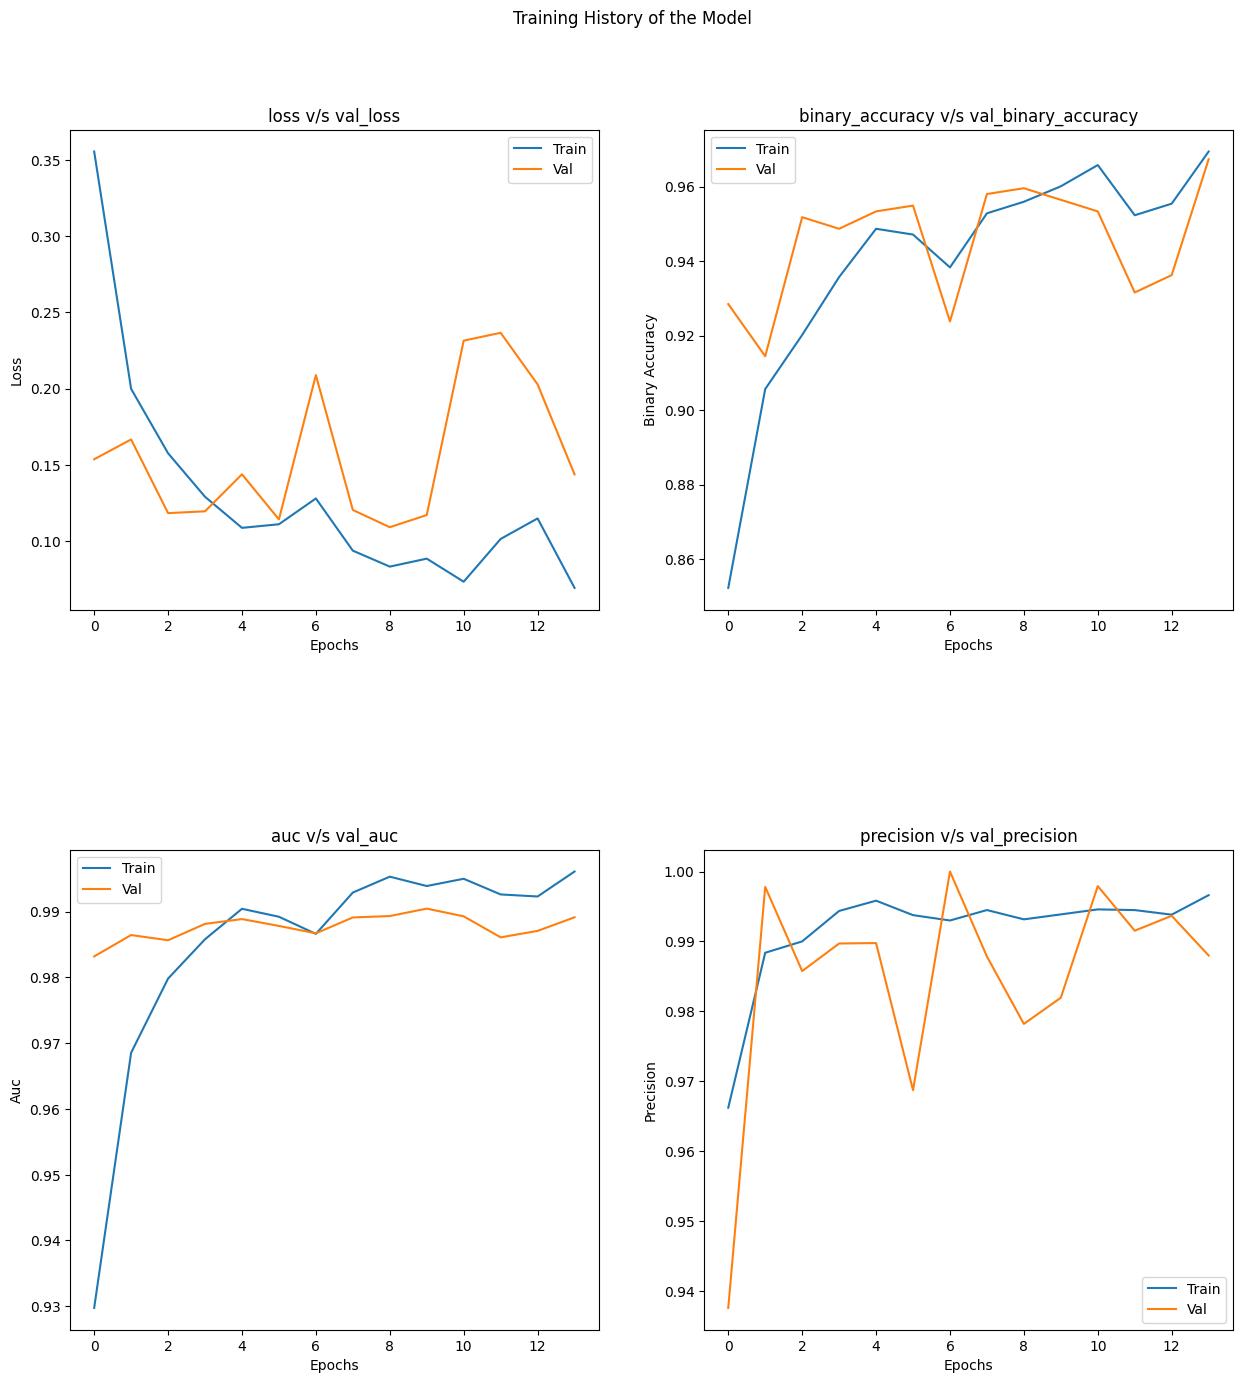

21/21 [==============================] - 17s 396ms/step


In [15]:
me.training_history()
me.predict()

              precision    recall  f1-score   support

Not Infected       0.87      0.93      0.90       134
    Infected       0.98      0.96      0.97       509

    accuracy                           0.95       643
   macro avg       0.92      0.94      0.93       643
weighted avg       0.96      0.95      0.96       643



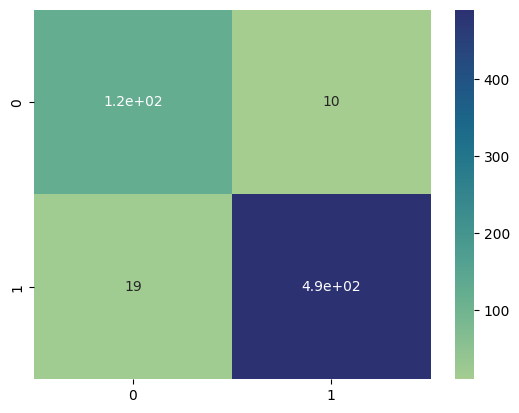

In [16]:
from sklearn.metrics import classification_report
me.class_report()

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 94080)             0         
                                                                 
 dense (Dense)               (None, 768)               72254208  
                                                                 
 dropout (Dropout)           (None, 768)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 769       
                                                                 
Total params: 90,576,961
Trainable params: 89,543,233
Non-tra

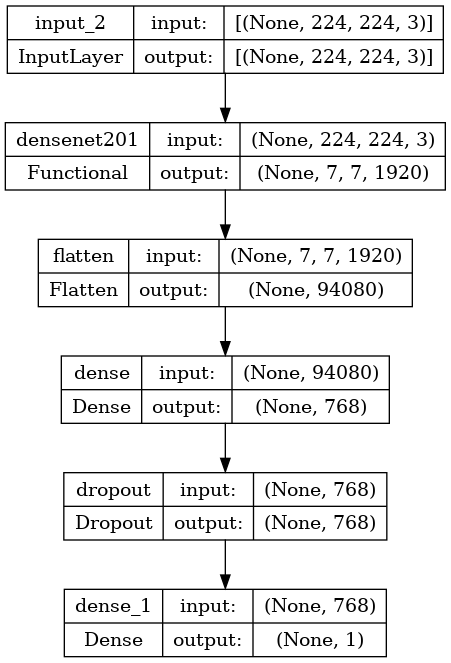

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Model Evaluation and Metrics Recording

In this code  a trained model's performance is evaluated, and various metrics are recorded.

#### Model Evaluation

- The `best_model` is evaluated using the `test_images` dataset, which contains the test data.

- The `evaluate` function is used to obtain metrics such as accuracy, loss, AUC, precision, and more.

#### Metrics Recording

- A `metrics_dict` is created to store the model's metrics. It contains metric names as keys and their corresponding results from the evaluation.

- The `metrics_dict` is transformed into a DataFrame named `df_metrics`. This DataFrame is structured with metrics as the index and metric values under the "Value" column.

- The code specifies the path for saving the metrics in a CSV file named "EfficientNetV2s_metrics.csv," located within the Kaggle working directory.

- Finally, the `df_metrics` DataFrame is saved to the CSV file using the `to_csv` method.

This code is valuable for evaluating a trained model and recording crucial metrics, simplifying the analysis and comparison of various models or model variations.


In [19]:
results = model.evaluate(test_images)

metrics_dict = dict(zip(model.metrics_names, results))

df_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Value'])


csv_path = "/kaggle/working/DenseNet201_metrics.csv"
df_metrics.to_csv(csv_path)
csv_path

21/21 [==============================] - 6s 270ms/step - loss: 0.1011 - binary_accuracy: 0.9549 - precision: 0.9800 - recall: 0.9627 - auc: 0.9894 - f1_score: 0.9713


'/kaggle/working/DenseNet201_metrics.csv'